<a href="https://colab.research.google.com/github/song-jiafeng/Inquisit-Web-BNUPSY/blob/master/Lecture2_demo_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import packages

use command **!pip install (package)** when package not available for import

In [2]:
#packages already available in colab
import networkx as nx #for analyzing networks using Python
import numpy as np #for fast general purpose coding operations (arrays, looping, etc)
import matplotlib.pyplot as plt #for plotting
import time #for tracking amount of time needed to run a line of code
import pandas as pd #for data manipulation (like Excel, but much more powerful)

In [3]:
#not available in default colab configuration
!pip install osmnx #for downloading street networks from internet
!pip install igraph #for network analysis. much faster than networkx for large networks
import osmnx as ox #import for use in notebook after downloading
import igraph as ig #import for use in notebook after downloading

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 39.9 MB/s eta 0:00:00


# download street network in area of interest

downloads directed network in networkx format

In [4]:
#downloads full street network in Hong Kong. too slow for class demo
"""
g_nx = ox.graph_from_place('Hong Kong', network_type='all')
"""
#downloads walking/driving street networks in Hong Kong (also too slow for class demo):
"""
g_nx = ox.graph_from_place('Hong Kong', network_type='walk')
g_nx = ox.graph_from_place('Hong Kong', network_type='drive')
"""

"\ng_nx = ox.graph_from_place('Hong Kong', network_type='walk')\ng_nx = ox.graph_from_place('Hong Kong', network_type='drive')\n"

In [5]:
#downloads street network within 'dist' meter radius of 'center_point' (specified in units of latitude,longitude)
#center point here chosen to be around Central, HK Island
g_nx_all = ox.graph_from_point(center_point=(22.2800, 114.1588), dist=500, network_type='all')

In [6]:
#downloads bikeable street network only
g_nx_bike = ox.graph_from_point(center_point=(22.2800, 114.1588), dist=500, network_type='bike')

In [7]:
#converts network to undirected graph, if desired
g_nx_bike_undirected = ox.convert.to_undirected(g_nx_bike)

# plot network

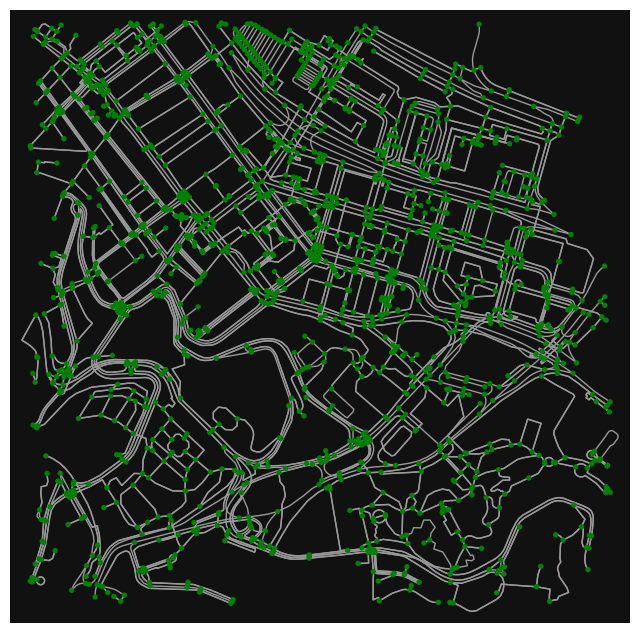

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
#all streets in bounding box
ox.plot_graph(g_nx_all,node_color='green')

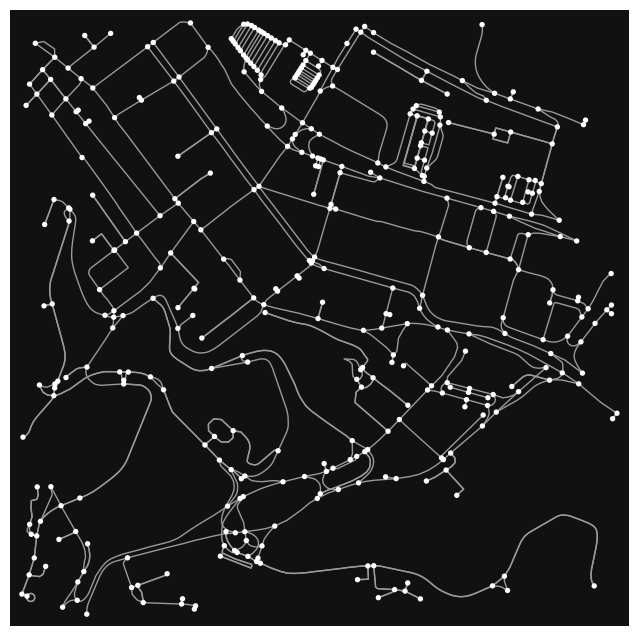

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
#only bike-friendly streets (ones with bike paths) in bounding box
ox.plot_graph(g_nx_bike)

# convert street network from networkx format to igraph format, if faster analysis needed.

networkx uses pure python and is can be too slow. igraph uses fast C code underneath its python syntax, and is much faster

In [20]:
g_ig = ig.Graph.from_networkx(g_nx_bike)

In [21]:
g_ig,g_nx_bike

(<igraph.Graph at 0x7e9913af0f50>,
 <networkx.classes.multidigraph.MultiDiGraph at 0x7e991436d280>)

# compare speed of computing betweenness centralities using networkx and igraph

In [12]:
start = time.time()
a = g_ig.betweenness()
print(time.time()-start,'seconds for igraph')

start = time.time()
a = nx.betweenness_centrality(g_nx_bike)
print(time.time()-start,'seconds for networkx')

0.0063114166259765625 seconds for igraph
0.3212289810180664 seconds for networkx


# compute list of network summary statistics

In [13]:
ox.basic_stats(g_nx_bike)

{'n': 402,
 'm': 655,
 'k_avg': 3.2587064676616917,
 'edge_length_total': 31725.202984919877,
 'edge_length_avg': 48.43542440445783,
 'streets_per_node_avg': 2.746268656716418,
 'streets_per_node_counts': {0: 0, 1: 67, 2: 12, 3: 280, 4: 42, 5: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.16666666666666666,
  2: 0.029850746268656716,
  3: 0.6965174129353234,
  4: 0.1044776119402985,
  5: 0.0024875621890547263},
 'intersection_count': 335,
 'street_length_total': 25508.202039938362,
 'street_segment_count': 531,
 'street_length_avg': 48.0380452729536,
 'circuity_avg': 1.0819525268662264,
 'self_loop_proportion': 0.0018832391713747645}

# plot network with nodes colored by statistic of interest

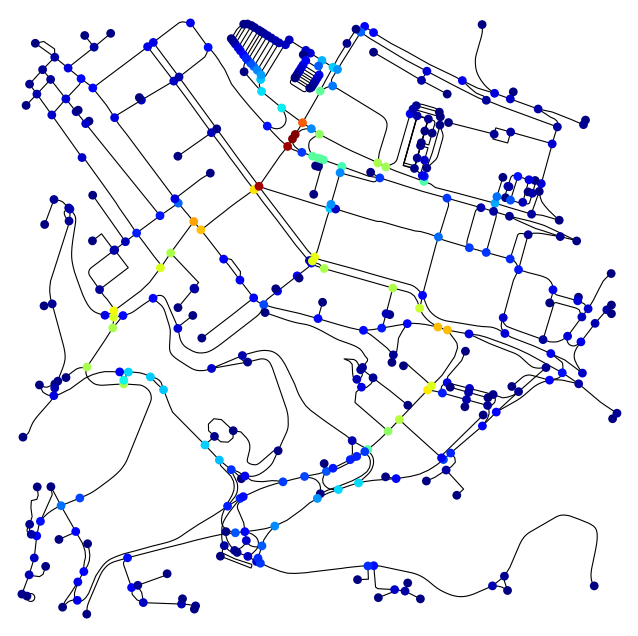

In [14]:
bc_nodes = nx.betweenness_centrality(g_nx_bike_undirected, weight="length") #bc_nodes stores betweenness values of *nodes* in network, with weights given by 'length' edge attribute
nx.set_node_attributes(g_nx_bike_undirected, bc_nodes, "bc_nodes")
nc = ox.plot.get_node_colors_by_attr(g_nx_bike_undirected, "bc_nodes", cmap="jet")
fig, ax = ox.plot_graph(
    g_nx_bike_undirected,
    node_color=nc,
    node_size=40,
    node_zorder=2,
    edge_linewidth=0.8,
    edge_color="black",
    bgcolor='w'
)

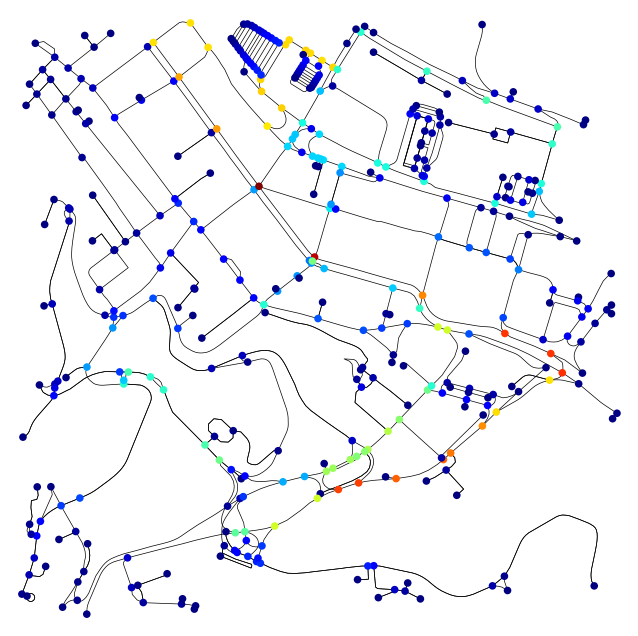

In [15]:
bc_nodes = nx.betweenness_centrality(g_nx_bike, weight="length") #bc_nodes stores betweenness values of *nodes* in network, with weights given by 'length' edge attribute
nx.set_node_attributes(g_nx_bike, bc_nodes, "bc_nodes")
nc = ox.plot.get_node_colors_by_attr(g_nx_bike, "bc_nodes", cmap="jet")
fig, ax = ox.plot_graph(
    g_nx_bike,
    node_color=nc,
    node_size=30,
    node_zorder=2,
    edge_linewidth=0.5,
    edge_color="black",
    bgcolor='w'
)

# plot network with edges colored by statistic of interest

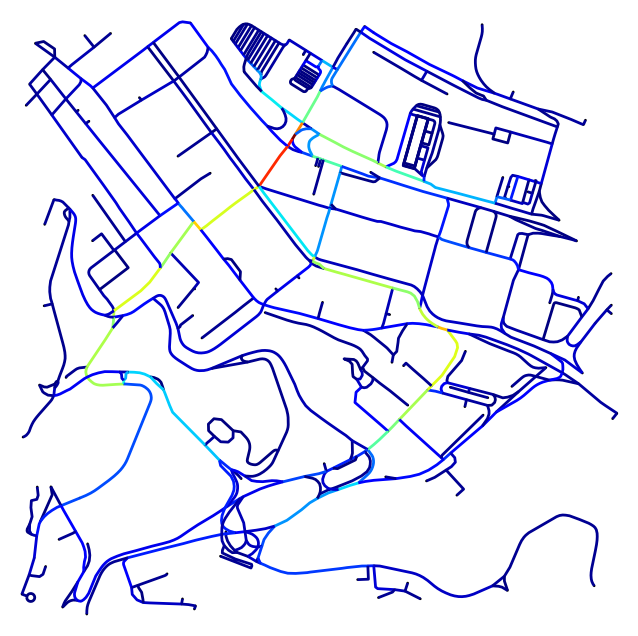

In [16]:
bc_edges = nx.edge_betweenness_centrality(g_nx_bike_undirected, weight="length") #bc_edges stores betweenness values of *edges* in network, with weights given by 'length' edge attribute
nx.set_edge_attributes(g_nx_bike_undirected, bc_edges, "bc_edges")
ec = ox.plot.get_edge_colors_by_attr(g_nx_bike_undirected, "bc_edges", cmap="jet")
fig, ax = ox.plot_graph(
    g_nx_bike_undirected,
    node_color='black',
    node_size=3,
    node_zorder=-1,
    edge_linewidth=2,
    edge_color=ec,
    bgcolor='w'
)

# plot MST of street network

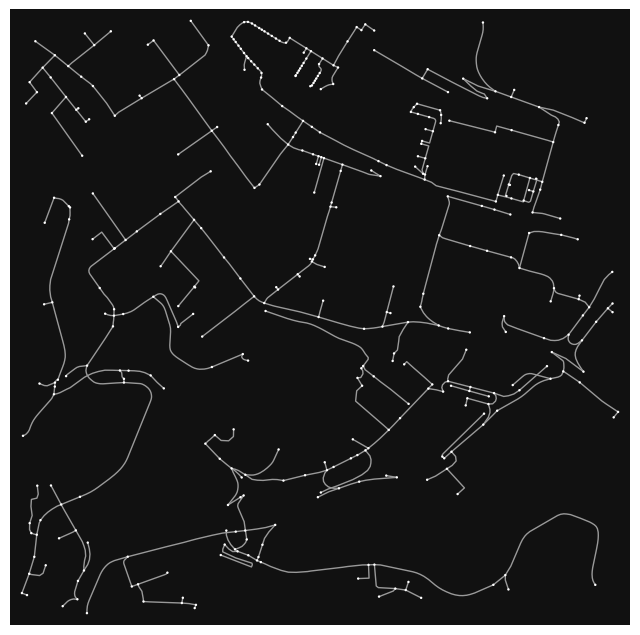

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [17]:
mst = nx.minimum_spanning_tree(g_nx_bike_undirected, weight="length")
ox.plot_graph(mst,node_size=3)

# plot shortest path length histogram for network

(array([3.420e+02, 4.550e+02, 4.530e+02, 5.220e+02, 6.090e+02, 6.100e+02,
        6.990e+02, 7.850e+02, 9.240e+02, 9.850e+02, 1.065e+03, 1.126e+03,
        1.109e+03, 1.235e+03, 1.300e+03, 1.379e+03, 1.538e+03, 1.558e+03,
        1.548e+03, 1.639e+03, 1.622e+03, 1.598e+03, 1.546e+03, 1.560e+03,
        1.602e+03, 1.659e+03, 1.709e+03, 1.618e+03, 1.520e+03, 1.365e+03,
        1.332e+03, 1.291e+03, 1.222e+03, 1.212e+03, 1.245e+03, 1.102e+03,
        1.001e+03, 9.510e+02, 9.290e+02, 8.910e+02, 8.340e+02, 6.680e+02,
        6.020e+02, 5.300e+02, 5.000e+02, 5.330e+02, 5.420e+02, 5.420e+02,
        5.650e+02, 5.380e+02, 6.040e+02, 5.910e+02, 5.740e+02, 5.120e+02,
        5.030e+02, 4.300e+02, 3.520e+02, 3.290e+02, 3.310e+02, 3.410e+02,
        2.850e+02, 2.920e+02, 2.880e+02, 2.970e+02, 2.860e+02, 3.350e+02,
        3.180e+02, 3.380e+02, 3.360e+02, 3.060e+02, 3.060e+02, 2.990e+02,
        2.350e+02, 2.470e+02, 2.300e+02, 2.220e+02, 2.040e+02, 1.900e+02,
        1.810e+02, 1.530e+02, 1.520e+0

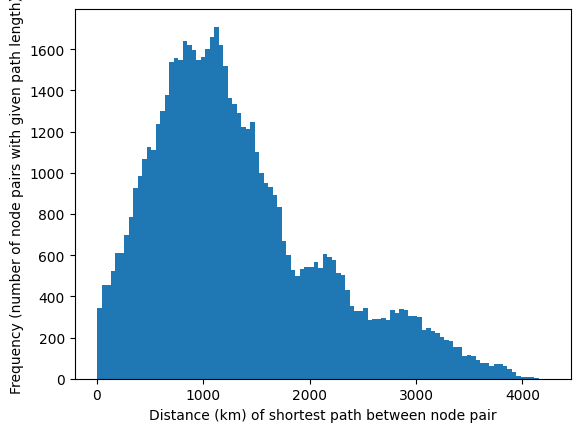

In [18]:
path_lengths_dict = dict(nx.all_pairs_dijkstra_path_length(g_nx_bike,weight='length'))
path_lengths = []
for i in path_lengths_dict.keys():
  for j in path_lengths_dict[i].keys():
    if i > j:
      path_lengths.append(path_lengths_dict[i][j])

plt.xlabel('Distance (km) of shortest path between node pair')
plt.ylabel('Frequency (number of node pairs with given path length)')
plt.hist(path_lengths,bins=100)

# polar histogram of street orientations

Text(0.5, 1.1, 'Hong Kong street network edge bearings')

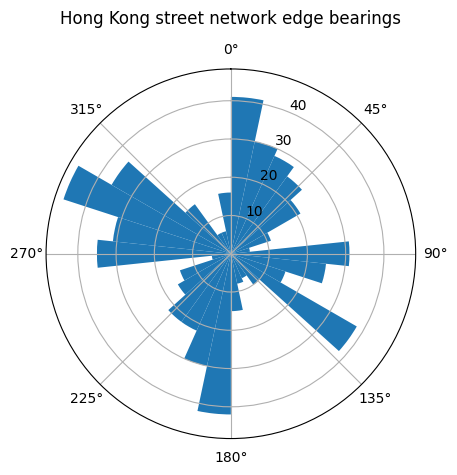

In [19]:
# calculate edge bearings (directions)
G = ox.add_edge_bearings(g_nx_bike)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True) if 'bearing' in data])

# polar plot
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Hong Kong street network edge bearings', y=1.1)

In [5]:
ox.settings.log_console = True
ox.settings.use_cache = True

# 1. Load and analyze HK network
G_hk = nx.read_graphml('hkstreets.graphml')

# Basic statistics
N_hk = G_hk.number_of_nodes()
E_hk = G_hk.number_of_edges()
total_length_hk = sum([G_hk[u][v].get('length', 0) for u, v in G_hk.edges()])

print(f"Hong Kong Network Statistics:")
print(f"Number of nodes (N): {N_hk}")
print(f"Number of edges (E): {E_hk}")
print(f"Total length: {total_length_hk:.2f} meters")


FileNotFoundError: [Errno 2] No such file or directory: 'hkstreets.graphml'

In [51]:
N = G_hk.number_of_nodes()
E = G_hk.number_of_edges()
total_length = sum(d['length'] for u, v, k, d in G_hk.edges(keys=True, data=True) if 'length' in d)

print(f"Number of nodes (N): {N}")
print(f"Number of edges (E): {E}")
print(f"Total length: {total_length:.2f} meters")

Number of nodes (N): 1361
Number of edges (E): 3303
Total length: 99533.11 meters


In [4]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

# Calculate closeness centrality for nodes
closeness_centrality = nx.closeness_centrality(G_hk, distance="length")

# Set node attributes with closeness centrality values
nx.set_node_attributes(G_hk, closeness_centrality, "closeness")

# Get node colors based on closeness centrality values using a color map
nc = ox.plot.get_node_colors_by_attr(G_hk, "closeness", cmap="viridis")

# Plot the graph with nodes colored by closeness centrality
fig, ax = ox.plot_graph(
    G_hk,
    node_color=nc,
    node_size=50,  # Adjust node size for better visualization
    node_zorder=2,
    edge_linewidth=0.8,
    edge_color="black",
    bgcolor='w'
)

NameError: name 'G_hk' is not defined

In [3]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.6 MB/s eta 0:00:00


### Interpretation of Closeness Centrality Plot

The plot shows the bike network with nodes colored based on their closeness centrality. Closeness centrality measures how "close" a node is to all other nodes in the network, based on the shortest path distance. Nodes with higher closeness centrality (indicated by warmer colors, e.g., yellow/red in the 'viridis' colormap) are, on average, closer to all other nodes in the network compared to nodes with lower closeness centrality (indicated by cooler colors, e.g., blue/purple).

In the context of a bike network, nodes with high closeness centrality represent intersections or points that are easily accessible from many other locations within the network. They are centrally located in terms of travel time or distance.

### Planning Scenario

A city planner or transportation engineer might want to see this plot to identify key intersections or areas that are most central to the bike network. This information is valuable for several planning decisions:

*   **Prioritizing Infrastructure Investments:** Nodes with high closeness centrality could be prioritized for improvements such as better signage, bike repair stations, or enhanced safety measures, as they are likely to be frequently used as connection points for many bike trips.
*   **Optimizing Route Planning:** Identifying central nodes can help in designing efficient bike routes that connect different parts of the city, ensuring good accessibility.
*   **Locating Services:** Businesses catering to cyclists, such as bike shops or cafes, might consider locating near high-closeness nodes to maximize their accessibility to potential customers.
*   **Understanding Network Flow:** Areas with high closeness centrality are likely to experience higher volumes of bike traffic, which can inform decisions about lane capacity and traffic management.

By visualizing closeness centrality, planners can gain insights into the network's structure and identify strategic locations for interventions to improve the overall efficiency and usability of the bike network.

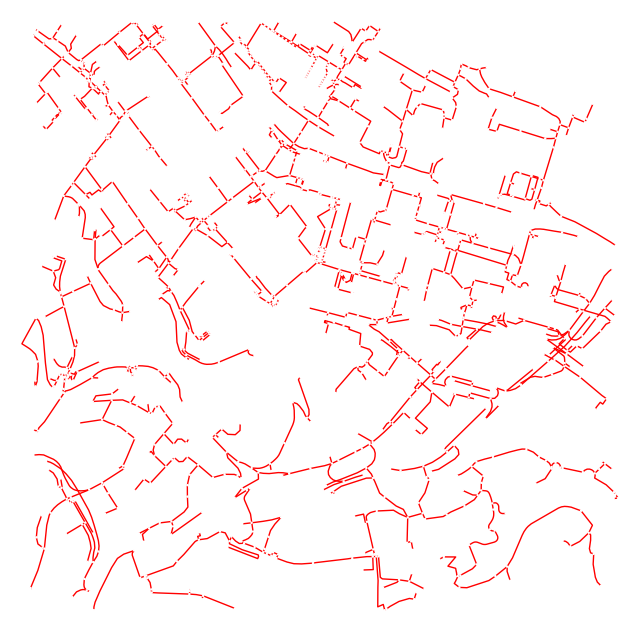

In [53]:
# Convert the directed graph to an undirected graph to compute the MST
G_hk_undirected = ox.convert.to_undirected(G_hk)

# Compute the Minimum Spanning Tree (MST)
# The MST connects all nodes with the minimum possible total edge weight (length in this case)
mst = nx.minimum_spanning_tree(G_hk_undirected, weight="length")

# Plot the MST
fig, ax = ox.plot_graph(mst, node_size=3, edge_color="red", bgcolor='w')

### Interpretation of Minimum Spanning Tree Plot

The Minimum Spanning Tree (MST) plot shows a subset of the original network's edges that connect all the nodes with the minimum possible total length. In the context of a street network, the MST can be thought of as the most "skeletal" representation of the network while still maintaining connectivity. It highlights the most essential connections needed to reach every intersection from every other intersection with the least amount of travel along the network edges.

### Planning Scenario

A city planner or infrastructure developer might want to see the MST plot for several reasons:

*   **Identifying Redundancy and Efficiency:** The MST can help identify areas of high redundancy in the network (edges not part of the MST) versus areas where connections are minimal. This can inform decisions about where new connections might be most impactful or where existing infrastructure could be optimized.
*   **Emergency Service Routing:** In a disaster scenario, if only a limited subset of the network is usable, the MST can represent a crucial core network that ensures connectivity for emergency services with the shortest possible total distance.
*   **Prioritizing Maintenance:** Edges that are part of the MST are critical for maintaining overall network connectivity. Prioritizing maintenance or upgrades on these edges could be essential to prevent large-scale disconnections.
*   **Estimating Minimum Infrastructure Cost:** The total length of the MST provides a lower bound on the total length of infrastructure required to connect all nodes in the network. This can be useful for initial cost estimations for building or rebuilding a network.

By visualizing the MST, planners can gain insights into the underlying structure and connectivity of the network, which can inform decisions related to efficiency, resilience, and resource allocation.

Text(0.5, 1.1, 'Hong Kong street network edge bearings')

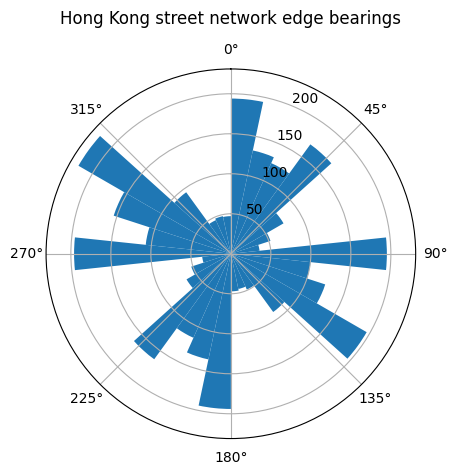

In [54]:
# calculate edge bearings (directions)
G = ox.add_edge_bearings(G_hk)
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True) if 'bearing' in data])

# polar plot
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Hong Kong street network edge bearings', y=1.1)

### Interpretation of Street Orientation Polar Histogram

The polar histogram shows the distribution of street orientations in the network. The bars indicate the frequency of streets facing a particular direction, with North at the top (0 or 360 degrees) and orientations increasing clockwise (East at 90, South at 180, West at 270). Taller bars indicate more streets aligned in that direction.

Analyzing this plot reveals the dominant street orientations in the Hong Kong bike network. For example, if there are tall bars at 0/180 and 90/270 degrees, it suggests a grid-like network structure. Peaks at other angles might indicate streets following topography or specific historical development patterns.

### Planning Scenario

An urban planner or transportation analyst might want to see this plot for several reasons:

*   **Understanding Network Structure:** The plot provides a quick overview of the network's layout and dominant patterns. This can inform decisions about how the network facilitates movement in different directions.
*   **Identifying Gaps in Connectivity:** If certain orientations have very low frequencies, it might indicate a lack of connectivity in those directions, which could be a target for future network expansion.
*   **Analyzing Walkability and Bikeability:** Street orientation can influence factors like sun exposure, wind patterns, and visibility, which are relevant for pedestrian and cyclist comfort and safety.
*   **Historical and Geographic Context:** The dominant orientations often reflect the historical development of the city and the influence of geographic features like coastlines, rivers, or hills. Understanding this can provide insights into the network's evolution and constraints.

By visualizing street orientations, planners can gain a better understanding of the network's structural characteristics and how they might impact transportation patterns and the urban environment.

In [60]:
g_nx_Beijing_walk = ox.graph_from_point(center_point=(39.9062, 116.3913), dist=500, network_type='walk')

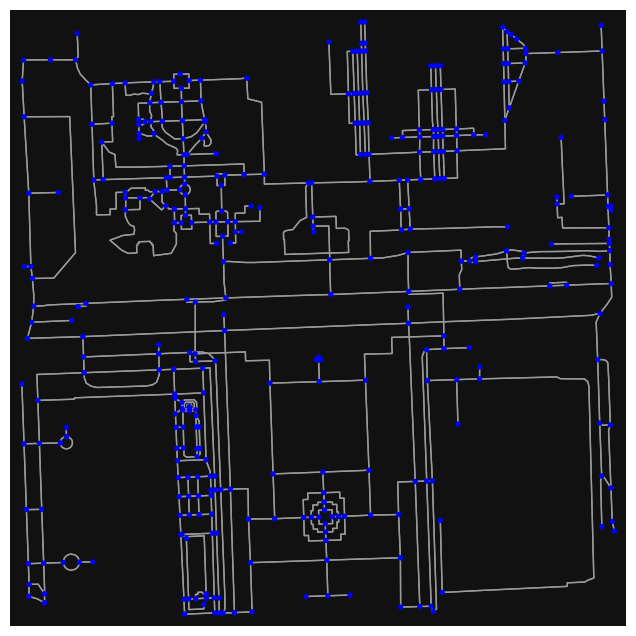

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [61]:
ox.plot_graph(g_nx_Beijing_walk,node_color='blue')